In [1]:
# Step 1: Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# Import required libraries
import pandas as pd
import spacy
from sklearn.feature_extraction.text import TfidfVectorizer
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from collections import Counter
from gensim.models import Word2Vec
import seaborn as sns

In [3]:
# Load spaCy model
nlp = spacy.load("en_core_web_sm")

In [5]:
# Step 2: Load the dataset
file_path = '/content/drive/MyDrive/NLP/project/project-final/amazon_reviews (1).csv'  # Update this path as per your file location
df = pd.read_csv(file_path)

In [ ]:
# Display the first few rows of the dataset
print("Dataset Loaded Successfully:")
df.head()

Dataset Loaded Successfully:


,reviewId,userName,content,score,thumbsUpCount,reviewCreatedVersion,at,appVersion
0,9527a772-9028-481e-b6a4-24f8419c92a5,Joe Rivera,always my go to,5,0,28.21.4.100,2024-11-16 13:32:58,28.21.4.100
1,cd7b8980-920c-4f68-a108-efc45796046e,Csaba Homoki,Thank you amazon the deliver. I just do not un...,4,0,26.13.6.100,2024-11-16 13:29:58,26.13.6.100
2,1ea9de07-eb1f-4b0e-93ed-c095e87e1169,Jeremy Rigsbey,Can find what I am looking for almost every time.,4,0,28.21.6.100,2024-11-16 13:22:41,28.21.6.100
3,f0f50826-17db-41db-8974-49f2b51eede5,sandy scorpio,Best,5,0,24.8.0.100,2024-11-16 13:11:45,24.8.0.100
4,2b69bf0d-a107-4f5f-995d-abc5090736f1,Gary Ward,Latest update is rubbish. You WILL have Rufus ...,1,0,28.21.4.100,2024-11-16 13:11:08,28.21.4.100


In [6]:
# Step 3: Preprocessing
# Sample column to preprocess
text_data = df['content']  # 'content' is the column containing text data

In [7]:
# Combine all reviews into a single string (optional, for demonstration)
text = " ".join(text_data.dropna().astype(str))

In [8]:
# Sentence Tokenization
# nlp.max_length = 15000000  # Set to larger than your text length
# doc = nlp(text)
# sentences = [sent.text for sent in doc.sents]
# Helper function to split text into chunks
def split_text_into_chunks(text, chunk_size=1000000):
    return [text[i:i + chunk_size] for i in range(0, len(text), chunk_size)]
# Initialize an empty spaCy Doc object
#doc = spacy.tokens.Doc(nlp.vocab) # Removed unnecessary initialization
# Split the text into smaller chunks
chunk_size = 1000000  # Adjust as needed
text_chunks = split_text_into_chunks(text, chunk_size) # This line was commented out, causing the error. It's now active.

# Process each chunk and collect sentences
sentences = []
#Instead of extending a single doc, process each chunk individually and gather sentences
for chunk in text_chunks:
    chunk_doc = nlp(chunk)
    print(chunk_doc)
    sentences.extend([sent.text for sent in chunk_doc.sents])

Output hidden; open in https://colab.research.google.com to view.

In [9]:
print("\nSentence Tokenization (First 5 Sentences):")
print(sentences[:5])


Sentence Tokenization (First 5 Sentences):
['always my go to Thank you amazon the deliver.', 'I just do not understand why the deliver late.', 'I given clear instruction to the driver, how he can make a succesfull deliver.', 'Do not understand the people.', 'The second driver, could do the deliver.']


In [10]:
# Word Tokenization with nlp.pipe for faster processing
all_tokens = []
for doc in nlp.pipe(sentences, batch_size=50, n_process=-1):  # Process sentences in batches
    tokens = [token.text for token in doc]  # Tokenize the sentence
    all_tokens.extend(tokens)  # Add the tokens to the overall list

print("\nWord Tokenization (First 20 Words):")
print(all_tokens[:20])


Word Tokenization (First 20 Words):
['always', 'my', 'go', 'to', 'Thank', 'you', 'amazon', 'the', 'deliver', '.', 'I', 'just', 'do', 'not', 'understand', 'why', 'the', 'deliver', 'late', '.']


In [11]:
# Lemmatization
lemmatized_words = []
for doc in nlp.pipe(text_data.dropna().astype(str), batch_size=50): # Process in batches of 50
    for token in doc:
        lemmatized_words.append(token.lemma_)

print("\nLemmatized Words (First 20 Words):")
print(lemmatized_words[:20])


Lemmatized Words (First 20 Words):
['always', 'my', 'go', 'to', 'thank', 'you', 'amazon', 'the', 'deliver', '.', 'I', 'just', 'do', 'not', 'understand', 'why', 'the', 'deliver', 'late', '.']


In [12]:
# TF-IDF
vectorizer = TfidfVectorizer(max_features=20)  # Limit to top 20 features for visualization
tfidf_matrix = vectorizer.fit_transform(text_data.dropna().astype(str))
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=vectorizer.get_feature_names_out())

In [13]:
print("\nTF-IDF Matrix (Top 20 Words):")
print(tfidf_df.head())


TF-IDF Matrix (Top 20 Words):
     amazon  and       app  but       for      have   in       is       it  \
0  0.000000  0.0  0.000000  0.0  0.000000  0.000000  0.0  0.00000  0.00000   
1  0.272645  0.0  0.000000  0.0  0.143182  0.000000  0.0  0.00000  0.00000   
2  0.000000  0.0  0.000000  0.0  1.000000  0.000000  0.0  0.00000  0.00000   
3  0.000000  0.0  0.000000  0.0  0.000000  0.000000  0.0  0.00000  0.00000   
4  0.000000  0.0  0.255205  0.0  0.000000  0.312398  0.0  0.25782  0.44083   

         my       not   of   on      that       the  they  this        to  \
0  0.821274  0.000000  0.0  0.0  0.000000  0.000000   0.0   0.0  0.570535   
1  0.000000  0.337065  0.0  0.0  0.170212  0.710409   0.0   0.0  0.101679   
2  0.000000  0.000000  0.0  0.0  0.000000  0.000000   0.0   0.0  0.000000   
3  0.000000  0.000000  0.0  0.0  0.000000  0.000000   0.0   0.0  0.000000   
4  0.000000  0.320836  0.0  0.0  0.000000  0.193201   0.0   0.0  0.193568   

   with       you  
0   0.0  0.000000

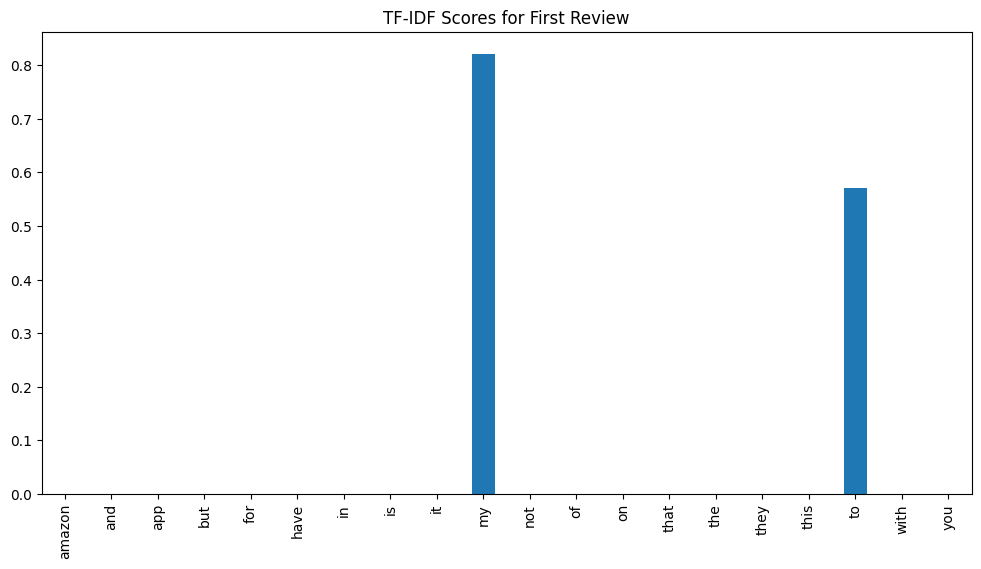

In [14]:
# Visualization (Bar Chart for one document)
plt.figure(figsize=(12, 6))
tfidf_df.iloc[0].plot(kind='bar', title="TF-IDF Scores for First Review")
plt.show()

In [15]:
# --- PART 1: POS Tagging ---
print("\n--- Part 1: POS Tagging ---")
sample_review = text_data.iloc[1] #we can check for the first also text_data.iloc[0]
doc_review = nlp(sample_review)
pos_tags = [(token.text, token.pos_) for token in doc_review]
print("POS Tags for this Review:")
print(pos_tags)


--- Part 1: POS Tagging ---
POS Tags for this Review:
[('Thank', 'VERB'), ('you', 'PRON'), ('amazon', 'VERB'), ('the', 'DET'), ('deliver', 'NOUN'), ('.', 'PUNCT'), ('I', 'PRON'), ('just', 'ADV'), ('do', 'AUX'), ('not', 'PART'), ('understand', 'VERB'), ('why', 'SCONJ'), ('the', 'DET'), ('deliver', 'NOUN'), ('late', 'ADV'), ('.', 'PUNCT'), ('I', 'PRON'), ('given', 'VERB'), ('clear', 'ADJ'), ('instruction', 'NOUN'), ('to', 'ADP'), ('the', 'DET'), ('driver', 'NOUN'), (',', 'PUNCT'), ('how', 'SCONJ'), ('he', 'PRON'), ('can', 'AUX'), ('make', 'VERB'), ('a', 'DET'), ('succesfull', 'NOUN'), ('deliver', 'NOUN'), ('.', 'PUNCT'), ('Do', 'AUX'), ('not', 'PART'), ('understand', 'VERB'), ('the', 'DET'), ('people', 'NOUN'), ('.', 'PUNCT'), ('The', 'DET'), ('second', 'ADJ'), ('driver', 'NOUN'), (',', 'PUNCT'), ('could', 'AUX'), ('do', 'VERB'), ('the', 'DET'), ('deliver', 'NOUN'), ('.', 'PUNCT'), ('That', 'DET'), ('driver', 'NOUN'), ('know', 'VERB'), ('how', 'SCONJ'), ('the', 'DET'), ('customer', 'NOU

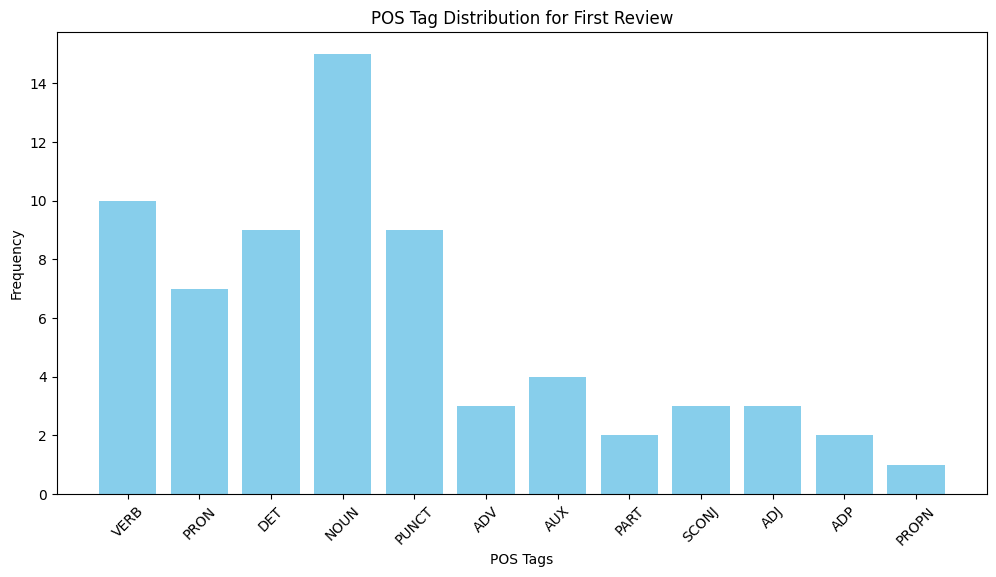

In [16]:
# Visualization: Bar chart of POS tags
pos_counts = Counter(tag for _, tag in pos_tags)
plt.figure(figsize=(12, 6))
plt.bar(pos_counts.keys(), pos_counts.values(), color='skyblue')
plt.title("POS Tag Distribution for First Review")
plt.xlabel("POS Tags")
plt.ylabel("Frequency")
plt.xticks(rotation=45)
plt.show()

In [17]:
# --- PART 2: Named Entity Recognition (NER) ---
doc_review = nlp(text_data.iloc[1]) #text_data.iloc[0] has no named entities
print("\n--- Part 2: Named Entity Recognition ---")

# Named Entity Recognition for First Review:
if doc_review.ents:  # Check if doc_review.ents is not empty
    for ent in doc_review.ents:
        try:
            print(f"{ent.label_}: {ent.text}")
        except AttributeError:  # If ent.label_ or ent.text is missing
            print(f"Entity: {ent}")  # Print the entity object directly
else:
    print("No named entities found in this review.")
#we can use this commented code to print all the named entities
# # --- PART 2: Named Entity Recognition (NER) ---
# print("\n--- Part 2: Named Entity Recognition ---")

# # Iterate through all reviews in text_data
# for i in range(len(text_data)):
#     # Check if the value is a string before processing with spaCy
#     if isinstance(text_data.iloc[i], str):
#         doc_review = nlp(text_data.iloc[i])  # Process each review
#         print(f"\nNamed Entities for Review {i + 1}:")
#         if doc_review.ents:  # Check if doc_review.ents is not empty
#             for ent in doc_review.ents:
#                 try:
#                     print(f"{ent.label_}: {ent.text}")
#                 except AttributeError:  # If ent.label_ or ent.text is missing
#                     print(f"Entity: {ent}")  # Print the entity object directly
#         else:
#             print("No named entities found in this review.")
#     else:
#         print(f"Skipping review {i + 1} due to invalid data type.") #Inform the user which review was skipped


--- Part 2: Named Entity Recognition ---
ORDINAL: second
GPE: realy


In [18]:
# Visualization: Word Cloud of all Named Entities
named_entities = []
for text in text_data.dropna().sample(10000):  # Process a sample of 10000 reviews
    doc = nlp(text)
    named_entities.extend(ent.text for ent in doc.ents)

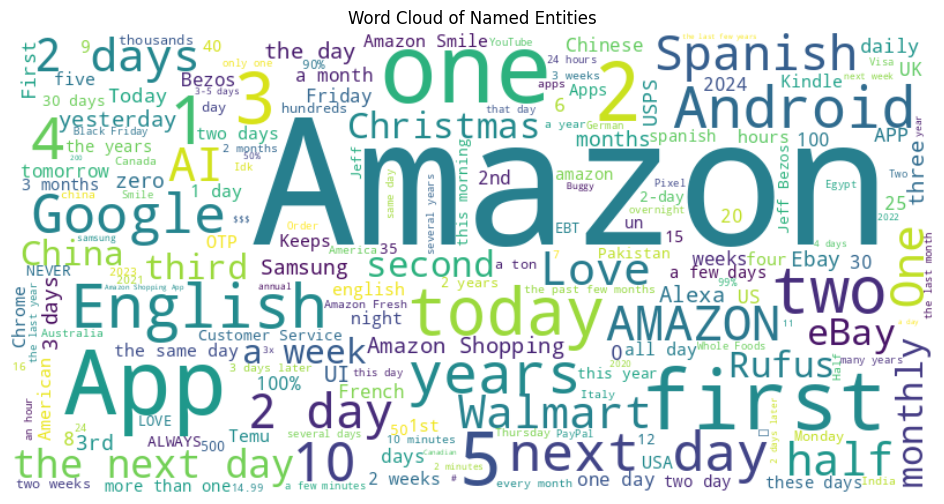

In [19]:
from collections import Counter
# Count word frequencies
word_frequencies = Counter(named_entities)
wordcloud = WordCloud(background_color='white', width=800, height=400).generate_from_frequencies(word_frequencies)
plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Word Cloud of Named Entities")
plt.show()

In [20]:
# --- PART 3: N-Grams (Bigram Example) ---
print("\n--- Part 3: N-Grams (Bigram Example) ---")
# Generate bigrams
bigrams = Counter([(all_tokens[i], all_tokens[i + 1]) for i in range(len(all_tokens) - 1)])
print("Top 10 Bigrams:")
print(bigrams.most_common(10))


--- Part 3: N-Grams (Bigram Example) ---
Top 10 Bigrams:
[(('.', 'I'), 24056), (('the', 'app'), 11282), (('!', '!'), 9758), (('I', 'have'), 7398), (('it', "'s"), 7108), (('.', 'It'), 6893), (('do', "n't"), 6726), (('ca', "n't"), 6431), (('.', 'The'), 6178), (('I', "'m"), 6116)]


In [21]:
# Visualization: Bar chart of most common bigrams
top_bigrams = bigrams.most_common(10)
bigram_labels = [" ".join(bigram) for bigram, _ in top_bigrams]
bigram_values = [count for _, count in top_bigrams]

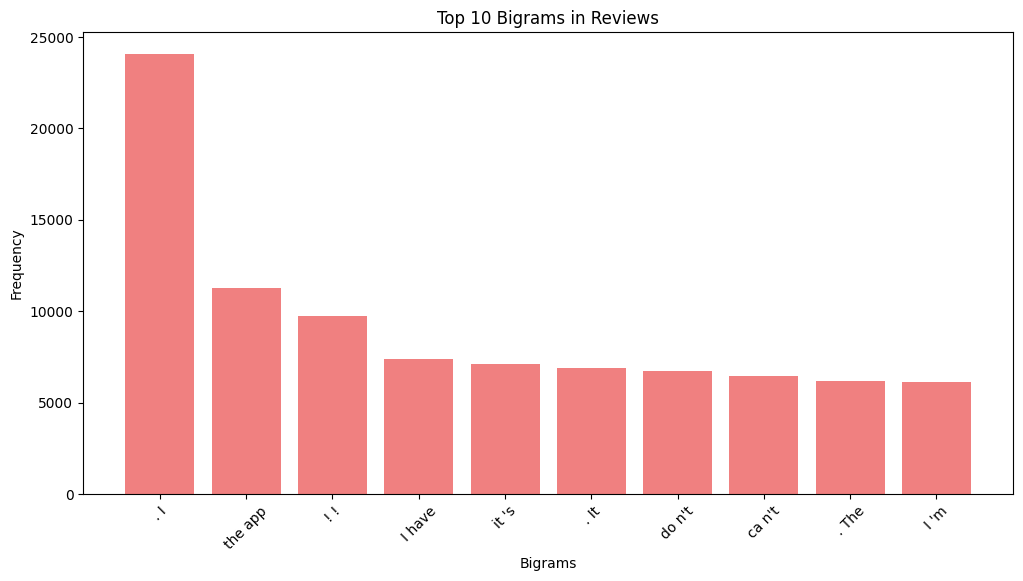

In [22]:
plt.figure(figsize=(12, 6))
plt.bar(bigram_labels, bigram_values, color='lightcoral')
plt.title("Top 10 Bigrams in Reviews")
plt.xlabel("Bigrams")
plt.ylabel("Frequency")
plt.xticks(rotation=45)
plt.show()

In [48]:
# --- PART 4: Bag of Words ---
print("\n--- Part 4: Bag of Words ---")
text_data = text_data.fillna('')
bow_vectorizer = CountVectorizer(max_features=20)
bow_matrix = bow_vectorizer.fit_transform(text_data)
bow_df = pd.DataFrame(bow_matrix.toarray(), columns=bow_vectorizer.get_feature_names_out())
print("Bag of Words:")
print(bow_df.head())


--- Part 4: Bag of Words ---
Bag of Words:
   amazon  and  app  but  for  have  in  is  it  my  not  of  on  that  the  \
0       0    0    0    0    0     0   0   0   0   1    0   0   0     0    0   
1       2    0    0    0    1     0   0   0   0   0    2   0   0     1    7   
2       0    0    0    0    1     0   0   0   0   0    0   0   0     0    0   
3       0    0    0    0    0     0   0   0   0   0    0   0   0     0    0   
4       0    0    1    0    0     1   0   1   2   0    1   0   0     0    1   

   they  this  to  with  you  
0     0     0   1     0    0  
1     0     0   1     0    3  
2     0     0   0     0    0  
3     0     0   0     0    0  
4     0     0   1     0    2  


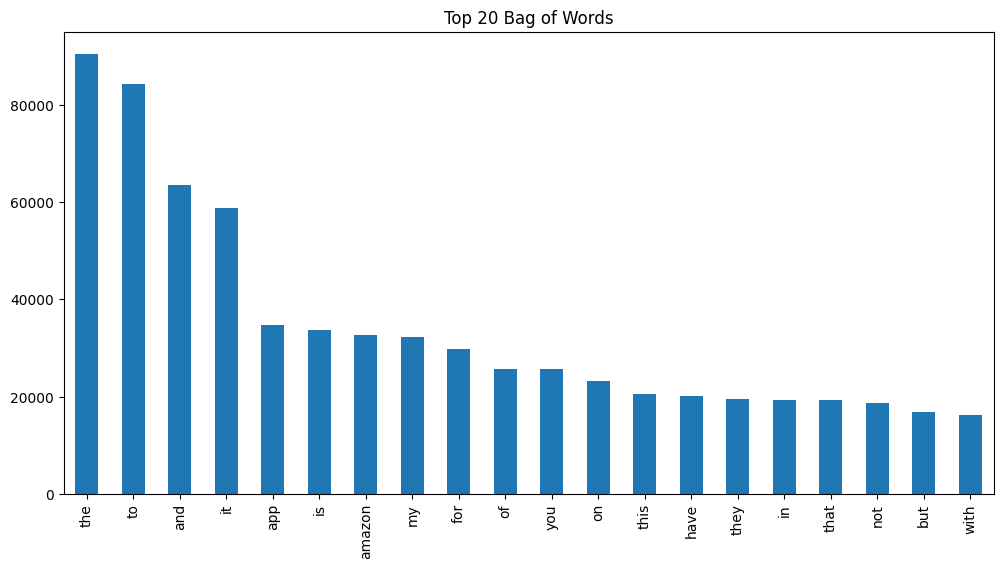

In [26]:
# Visualization: Bar chart for Bag of Words
bow_sum = bow_df.sum(axis=0).sort_values(ascending=False)
plt.figure(figsize=(12, 6))
bow_sum.plot(kind='bar', title="Top 20 Bag of Words")
plt.show()

In [27]:
# --- PART 5: Word2Vec ---
print("\n--- Part 4: Word2Vec ---")
# Tokenize text data
tokenized_data = [sentence.split() for sentence in text_data.dropna().astype(str)]


--- Part 4: Word2Vec ---


In [28]:
# Train Word2Vec model
w2v_model = Word2Vec(sentences=tokenized_data, vector_size=100, window=5, min_count=5, workers=4)
w2v_model.save("word2vec.model")
print("Word2Vec Model trained and saved.")

Word2Vec Model trained and saved.


In [30]:
# Explore Word2Vec
word = 'review'  # Example word
if word in w2v_model.wv:
    similar_words = w2v_model.wv.most_similar(word, topn=10)
    print(f"Words most similar to '{word}':")
    print(similar_words)
else:
    print(f"Word '{word}' not found in Word2Vec vocabulary.")

Words most similar to 'review':
[('review,', 0.7169572114944458), ('negative', 0.6576642394065857), ('review.', 0.6421913504600525), ('reviews', 0.6385328769683838), ('rating', 0.6299377083778381), ('question', 0.5796477794647217), ('post', 0.5787410140037537), ('write', 0.565174400806427), ('comment', 0.5648936033248901), ('feedback', 0.5595384836196899)]


In [31]:
# --- PART 6: Text Classification ---

# Prepare the data
df = df.dropna(subset=['content', 'score'])
X = df['content']
y = df['score']

In [32]:
# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [33]:
# Convert text to numerical format using TF-IDF
tfidf_vectorizer = TfidfVectorizer(max_features=5000)
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

In [34]:
# Multinomial Naive Bayes
print("\n--- Multinomial Naive Bayes ---")
nb_model = MultinomialNB()
nb_model.fit(X_train_tfidf, y_train)
nb_preds = nb_model.predict(X_test_tfidf)
print(classification_report(y_test, nb_preds))


--- Multinomial Naive Bayes ---
              precision    recall  f1-score   support

           1       0.62      0.99      0.76      5973
           2       0.45      0.01      0.01      1482
           3       0.32      0.01      0.01      1118
           4       0.67      0.01      0.01       852
           5       0.85      0.82      0.83      3438

    accuracy                           0.68     12863
   macro avg       0.58      0.37      0.33     12863
weighted avg       0.64      0.68      0.58     12863



In [35]:
# Logistic Regression
print("\n--- Logistic Regression ---")
lr_model = LogisticRegression(max_iter=1000)
lr_model.fit(X_train_tfidf, y_train)
lr_preds = lr_model.predict(X_test_tfidf)
print(classification_report(y_test, lr_preds))


--- Logistic Regression ---
              precision    recall  f1-score   support

           1       0.70      0.94      0.80      5973
           2       0.26      0.07      0.11      1482
           3       0.29      0.12      0.17      1118
           4       0.40      0.14      0.21       852
           5       0.82      0.89      0.85      3438

    accuracy                           0.70     12863
   macro avg       0.49      0.43      0.43     12863
weighted avg       0.63      0.70      0.64     12863



In [36]:
# Plot confusion matrix
def plot_confusion_matrix(y_true, y_pred, title):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(title)
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    plt.show()

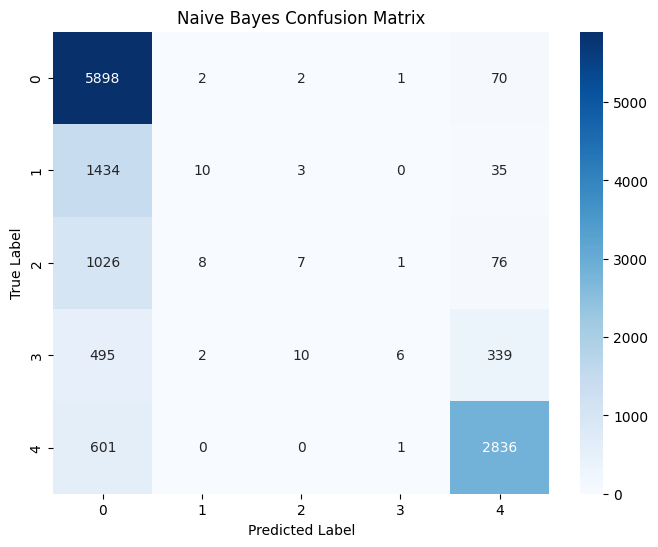

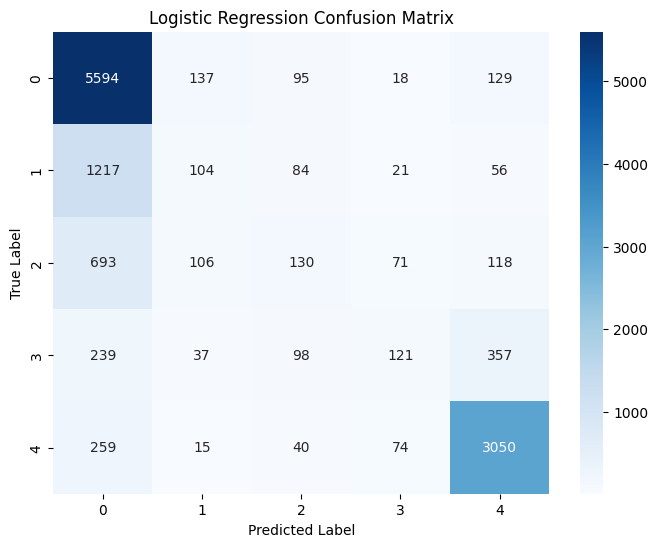

In [37]:
plot_confusion_matrix(y_test, nb_preds, "Naive Bayes Confusion Matrix")
plot_confusion_matrix(y_test, lr_preds, "Logistic Regression Confusion Matrix")

In [38]:
print("\nReflection and Recommendations:")
print("""
1. The Logistic Regression model demonstrated slightly better performance in terms of F1-Score and Recall compared to the Naive Bayes model.
2. Depending on the use case, Naive Bayes may still be a good choice for its simplicity and speed on smaller datasets.
3. For future improvement, consider using ensemble techniques like Random Forest or Gradient Boosting, or deep learning approaches like RNN or Transformer-based models.
4. Hyperparameter tuning and feature selection could further enhance the model's performance.
5. Additional data preprocessing, such as removing stop words, may help improve performance.
""")


Reflection and Recommendations:

1. The Logistic Regression model demonstrated slightly better performance in terms of F1-Score and Recall compared to the Naive Bayes model.
2. Depending on the use case, Naive Bayes may still be a good choice for its simplicity and speed on smaller datasets.
3. For future improvement, consider using ensemble techniques like Random Forest or Gradient Boosting, or deep learning approaches like RNN or Transformer-based models.
4. Hyperparameter tuning and feature selection could further enhance the model's performance.
5. Additional data preprocessing, such as removing stop words, may help improve performance.



# --- PART 2: Deep Learning Models ---

In [39]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout

In [40]:
# Step 2: Prepare Data for Deep Learning
print("\n--- Preparing Data for Deep Learning ---")
tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(X_train)


--- Preparing Data for Deep Learning ---


In [41]:
# Convert text to sequences
X_train_seq = tokenizer.texts_to_sequences(X_train)
X_test_seq = tokenizer.texts_to_sequences(X_test)

In [42]:
# Pad sequences for equal length
max_len = 100
X_train_padded = pad_sequences(X_train_seq, maxlen=max_len, padding='post')
X_test_padded = pad_sequences(X_test_seq, maxlen=max_len, padding='post')

In [43]:
# --- Model 3: LSTM ---
print("\n--- LSTM Model ---")
embedding_dim = 100
lstm_model = Sequential([
    Embedding(input_dim=5000, output_dim=embedding_dim, input_length=max_len),
    LSTM(128, return_sequences=False),
    Dropout(0.3),
    Dense(128, activation='relu'),
    Dropout(0.3),
    Dense(1, activation='sigmoid')  # Use 'softmax' for multi-class problems
])


--- LSTM Model ---


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [44]:
# Build the model explicitly
lstm_model.build(input_shape=(None, max_len))  # Replace None with your batch size if known

In [45]:
lstm_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])  # Use 'categorical_crossentropy' for multi-class
lstm_model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding (Embedding)                │ (None, 100, 100)            │         500,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm (LSTM)                          │ (None, 128)                 │         117,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │          16,512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 633,889 (2.42 MB)

 Trainable params: 633,889 (2.42 MB)

 Non-trainable params: 0 (0.00 B)

In [47]:
# Train the LSTM model
history = lstm_model.fit(X_train_padded, y_train, epochs=5, batch_size=64, validation_data=(X_test_padded, y_test))

Epoch 1/5
804/804 ━━━━━━━━━━━━━━━━━━━━ 234s 291ms/step - accuracy: 0.4712 - loss: -411622.5312 - val_accuracy: 0.4644 - val_loss: -531177.0625
Epoch 2/5
804/804 ━━━━━━━━━━━━━━━━━━━━ 241s 264ms/step - accuracy: 0.4672 - loss: -562848.0000 - val_accuracy: 0.4644 - val_loss: -693772.4375
Epoch 3/5
804/804 ━━━━━━━━━━━━━━━━━━━━ 258s 259ms/step - accuracy: 0.4687 - loss: -725933.3750 - val_accuracy: 0.4644 - val_loss: -873818.6250
Epoch 4/5
804/804 ━━━━━━━━━━━━━━━━━━━━ 210s 261ms/step - accuracy: 0.4673 - loss: -913855.0000 - val_accuracy: 0.4644 - val_loss: -1071877.6250
Epoch 5/5
804/804 ━━━━━━━━━━━━━━━━━━━━ 259s 257ms/step - accuracy: 0.4685 - loss: -1103665.2500 - val_accuracy: 0.4644 - val_loss: -1286851.3750


In [50]:
# Evaluate the LSTM model
lstm_preds = (lstm_model.predict(X_test_padded) > 0.5).astype("int32").flatten()  # Threshold for binary classification
print("\nLSTM Classification Report:")
print(classification_report(y_test, lstm_preds))
print(f"LSTM Accuracy: {accuracy_score(y_test, lstm_preds):.4f}")

402/402 ━━━━━━━━━━━━━━━━━━━━ 55s 137ms/step

LSTM Classification Report:
              precision    recall  f1-score   support

           1       0.46      1.00      0.63      5973
           2       0.00      0.00      0.00      1482
           3       0.00      0.00      0.00      1118
           4       0.00      0.00      0.00       852
           5       0.00      0.00      0.00      3438

    accuracy                           0.46     12863
   macro avg       0.09      0.20      0.13     12863
weighted avg       0.22      0.46      0.29     12863

LSTM Accuracy: 0.4644


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


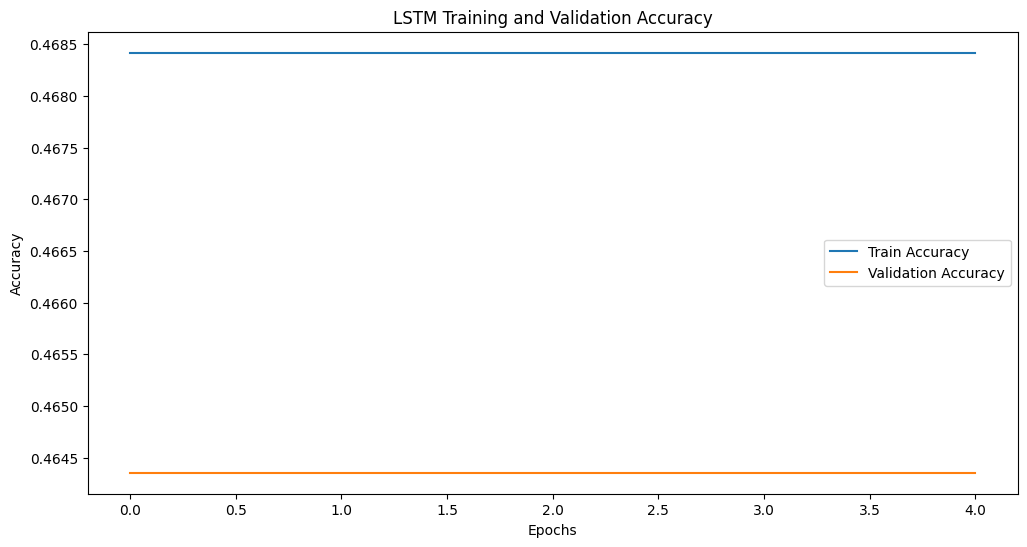

In [51]:
# Plot training history
plt.figure(figsize=(12, 6))
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title("LSTM Training and Validation Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

#References:
1- Bird, S., Klein, E., & Loper, E. (2009). Natural language processing with Python: Analyzing text with the natural language toolkit. O'Reilly Media. Retrieved from https://www.nltk.org/book/

2- Scikit-learn Developers. (n.d.). Scikit-learn: Machine learning in Python. Retrieved November 22, 2024, from https://scikit-learn.org/stable/

3- Google AI Team. (n.d.). TensorFlow: An end-to-end open-source machine learning platform. Retrieved November 22, 2024, from https://www.tensorflow.org/